In [ ]:
# following https://www.geeksforgeeks.org/deep-learning/visualizing-feature-maps-using-pytorch/

In [1]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Define the image transformations
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=0., std=1.)  # Normalize the image tensor
])

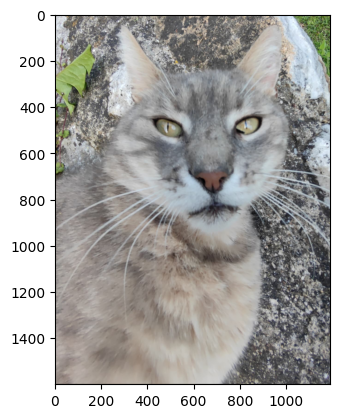

In [3]:
# Load the image
input_image = Image.open(str('harry.jpeg')) # add your image path
plt.imshow(input_image)
plt.show()

In [4]:
# Load a pre-trained VGG16 model
pretrained_model = models.vgg16(pretrained=True)

# Extract convolutional layers and their weights
conv_weights = []  # List to store convolutional layer weights
conv_layers = []  # List to store convolutional layers
total_conv_layers = 0  # Counter for total convolutional layers

/home/tatjanagobold/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tatjanagobold/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
# Traverse through the model to extract convolutional layers and their weights
for module in pretrained_model.features.children():
    if isinstance(module, nn.Conv2d):
        total_conv_layers += 1
        conv_weights.append(module.weight)
        conv_layers.append(module)

print(f"Total convolution layers: {total_conv_layers}")

Total convolution layers: 13


In [6]:
# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pretrained_model = pretrained_model.to(device)

# Preprocess the image and move it to GPU
input_image = image_transform(input_image)
input_image = input_image.unsqueeze(0)  # Add a batch dimension
input_image = input_image.to(device)

# Extract feature maps
feature_maps = []  # List to store feature maps
layer_names = []  # List to store layer names
for layer in conv_layers:
    input_image = layer(input_image)
    feature_maps.append(input_image)
    layer_names.append(str(layer))

In [7]:
# Display feature maps shapes
print("\nFeature maps shape")
for feature_map in feature_maps:
    print(feature_map.shape)

# Process and visualize feature maps
processed_feature_maps = []  # List to store processed feature maps
for feature_map in feature_maps:
    feature_map = feature_map.squeeze(0)  # Remove the batch dimension
    mean_feature_map = torch.sum(feature_map, 0) / feature_map.shape[0]  # Compute mean across channels
    processed_feature_maps.append(mean_feature_map.data.cpu().numpy())


Feature maps shape
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 128, 224, 224])
torch.Size([1, 128, 224, 224])
torch.Size([1, 256, 224, 224])
torch.Size([1, 256, 224, 224])
torch.Size([1, 256, 224, 224])
torch.Size([1, 512, 224, 224])
torch.Size([1, 512, 224, 224])
torch.Size([1, 512, 224, 224])
torch.Size([1, 512, 224, 224])
torch.Size([1, 512, 224, 224])
torch.Size([1, 512, 224, 224])



Processed feature maps shape
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)


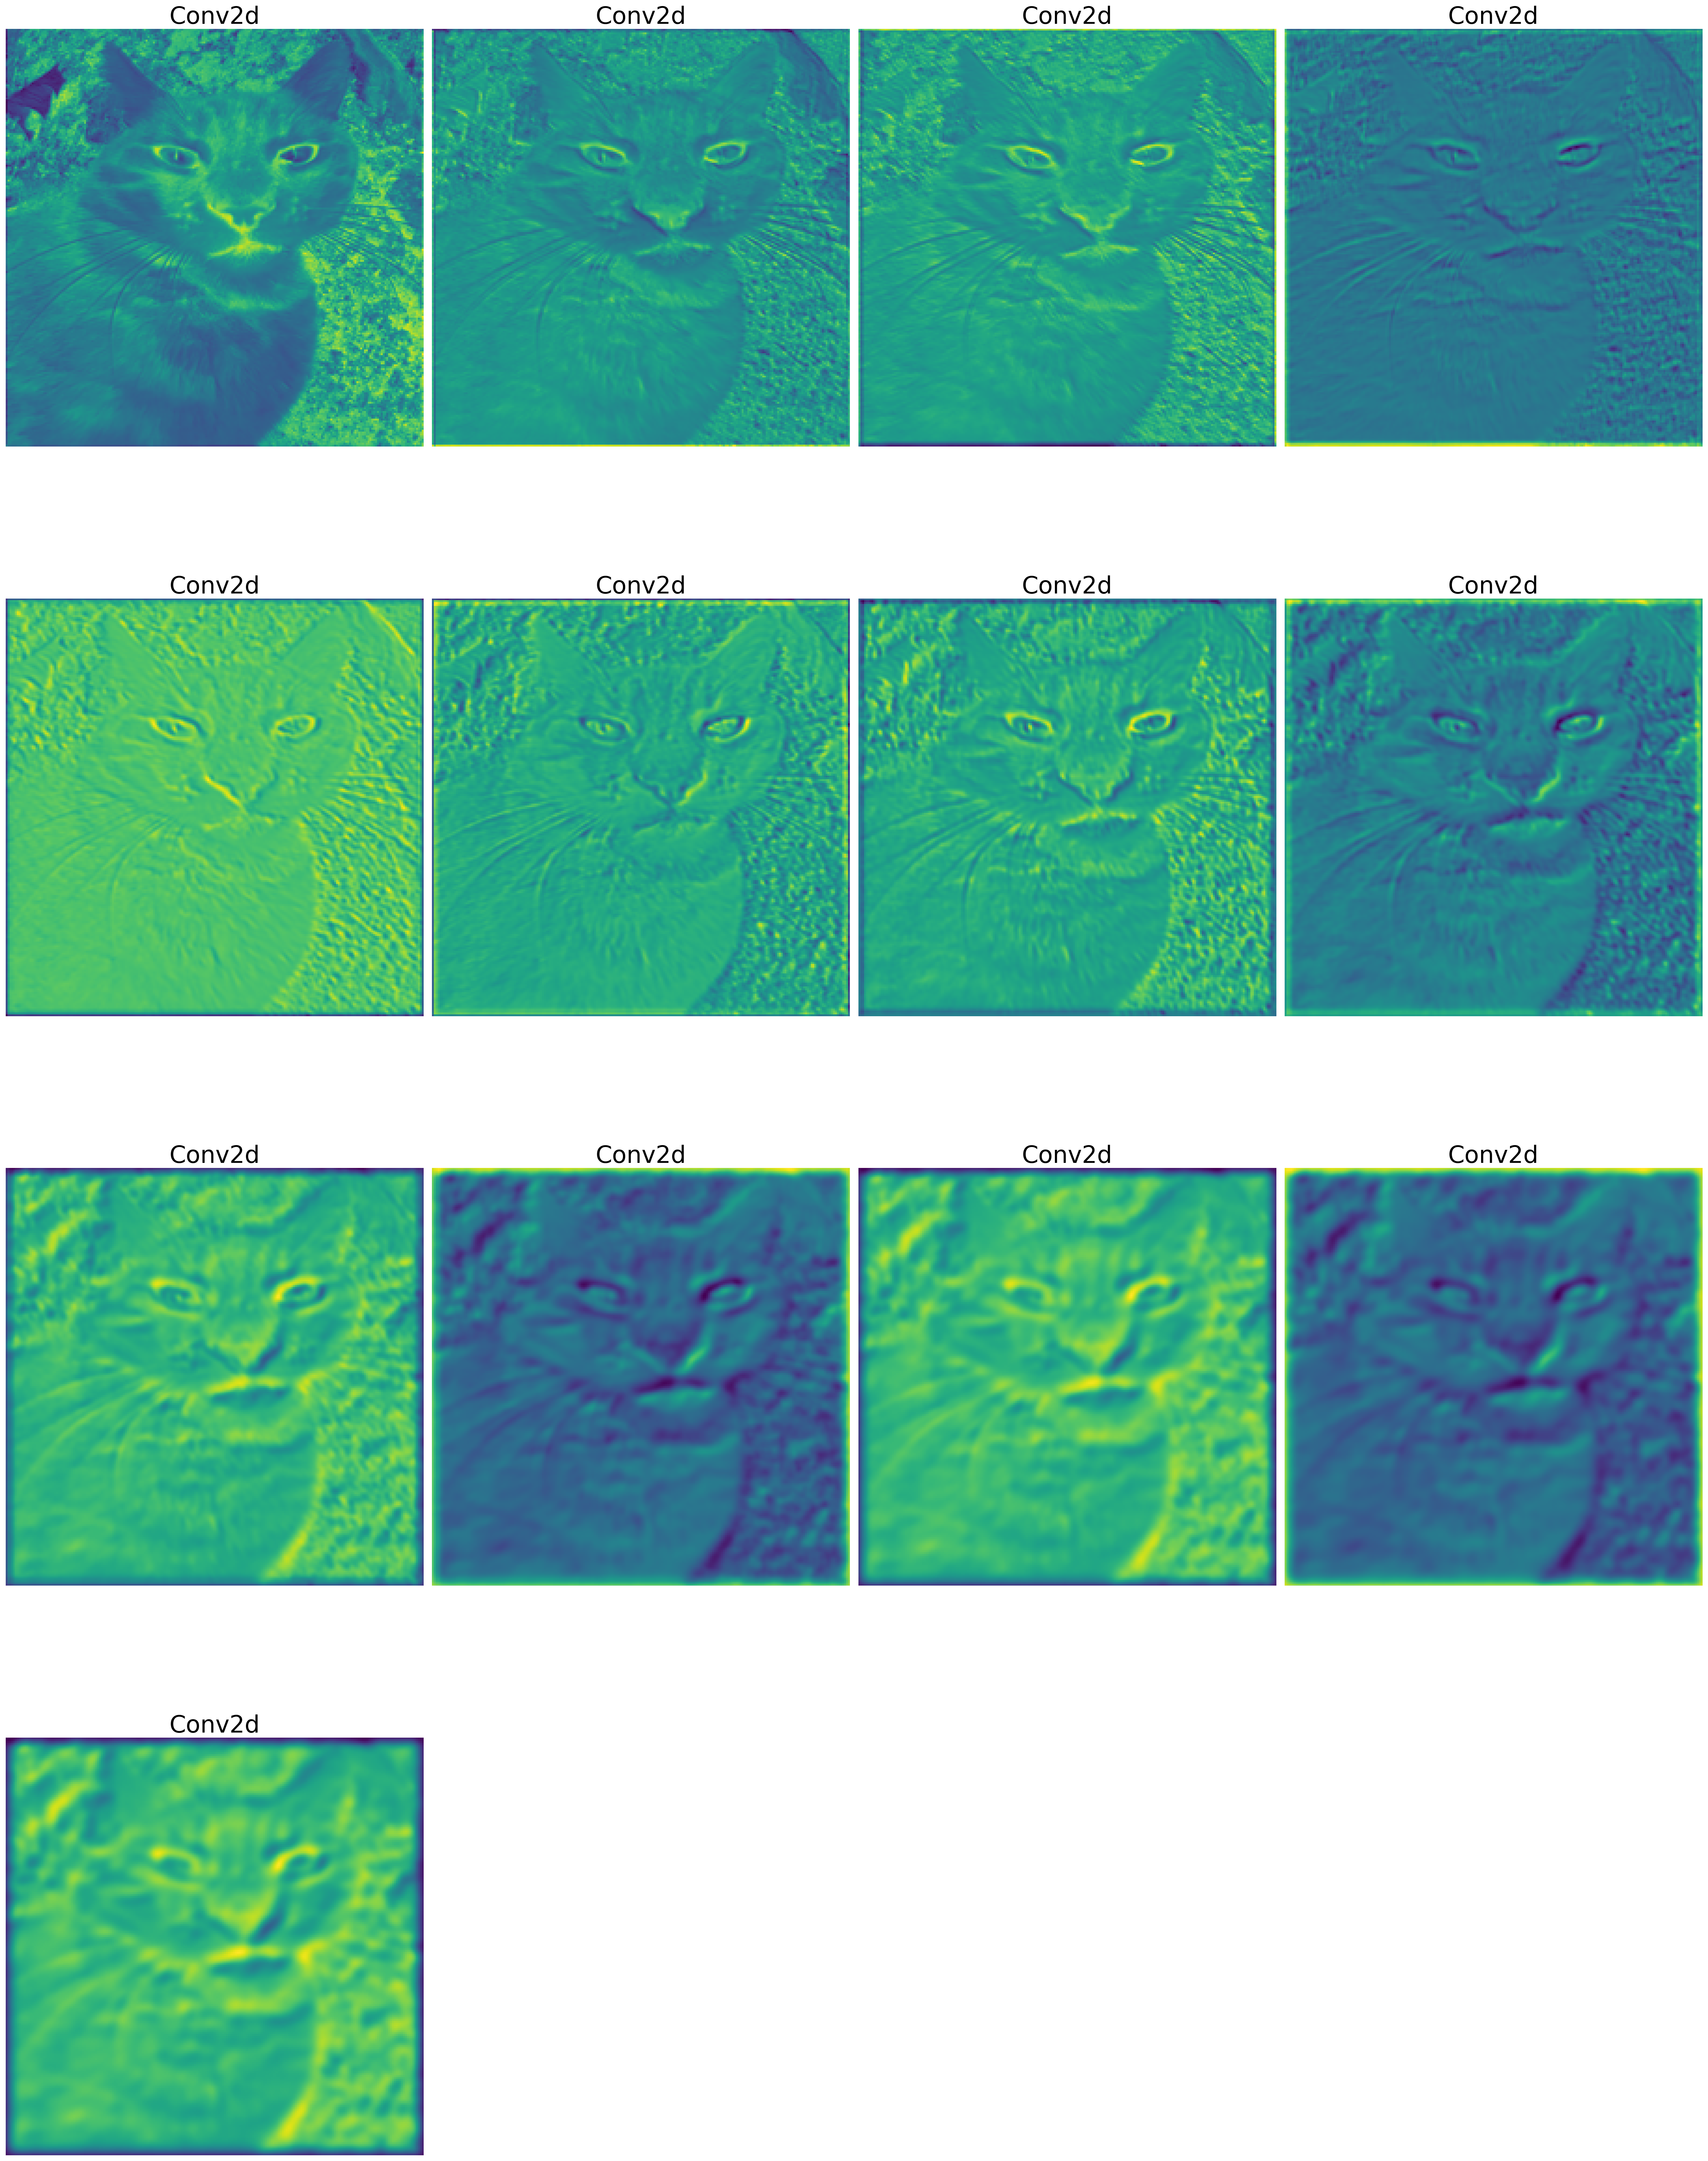

In [8]:
import matplotlib.pyplot as plt

# Display processed feature maps shapes
print("\nProcessed feature maps shape")
for fm in processed_feature_maps:
    print(fm.shape)

# Plot the feature maps
fig = plt.figure(figsize=(30, 50), dpi=180)

for i in range(len(processed_feature_maps)):
    ax = fig.add_subplot(5, 4, i + 1)
    ax.imshow(processed_feature_maps[i], cmap='viridis')  # optional: change colormap
    ax.axis("off")
    ax.set_title(layer_names[i].split('(')[0], fontsize=30)

# Adjust layout to avoid overlaps
plt.tight_layout()

plt.savefig(
    "harry_featuremap.png",  # filename
    dpi=300,                              # image resolution (increase for publication)
    bbox_inches='tight',                  # trim extra whitespace
    pad_inches=0.1                        # small padding
)

# Optional: also display it in notebook or interactive window
plt.show()

In [11]:
import torch
from torchvision import models
import torch.nn as nn

# Load pre-trained VGG16
pretrained_model = models.vgg16(pretrained=True)

# Extract convolutional layers
conv_layers = [module for module in pretrained_model.features if isinstance(module, nn.Conv2d)]

# Print numerical values of kernels
for idx, layer in enumerate(conv_layers):
    print(f"\n--- Conv Layer {idx + 1} ---")
    kernels = layer.weight.data.cpu()  # move to CPU if on GPU
    print(f"Shape: {kernels.shape}")  # [out_channels, in_channels, H, W]
    
    # Print all kernel values (this can be large)
    print(kernels)


print(kernels[:2])  # prints the first 2 filters only


--- Conv Layer 1 ---
Shape: torch.Size([64, 3, 3, 3])
tensor([[[[-5.5373e-01,  1.4270e-01,  5.2896e-01],
          [-5.8312e-01,  3.5655e-01,  7.6566e-01],
          [-6.9022e-01, -4.8019e-02,  4.8409e-01]],

         [[ 1.7548e-01,  9.8630e-03, -8.1413e-02],
          [ 4.4089e-02, -7.0323e-02, -2.6035e-01],
          [ 1.3239e-01, -1.7279e-01, -1.3226e-01]],

         [[ 3.1303e-01, -1.6591e-01, -4.2752e-01],
          [ 4.7519e-01, -8.2677e-02, -4.8700e-01],
          [ 6.3203e-01,  1.9308e-02, -2.7753e-01]]],


        [[[ 2.3254e-01,  1.2666e-01,  1.8605e-01],
          [-4.2805e-01, -2.4349e-01,  2.4628e-01],
          [-2.5066e-01,  1.4177e-01, -5.4864e-03]],

         [[-1.4076e-01, -2.1903e-01,  1.5041e-01],
          [-8.4127e-01, -3.5176e-01,  5.6398e-01],
          [-2.4194e-01,  5.1928e-01,  5.3915e-01]],

         [[-3.1432e-01, -3.7048e-01, -1.3094e-01],
          [-4.7144e-01, -1.5503e-01,  3.4589e-01],
          [ 5.4384e-02,  5.8683e-01,  4.9580e-01]]],


        [[[